<a href="https://colab.research.google.com/github/watikarosm/Automaton/blob/master/SeeMovement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# prompt: open image, change color to grayscale, print image shape, reshape of image to 128 x 128, print image as an array, save the array to .csv file

# Import libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image = Image.open("/content/WhereIsTheHunter7.png")

# Convert to grayscale
image = image.convert('L')

# Print the image shape
print(image.size)

# Reshape the image to 128x128
image = image.resize((128, 128))

# Print the image as an array
image_array = np.array(image)
print(image_array)

# Save the array to a .csv file
np.savetxt("image.csv", image_array, delimiter=",")


(538, 353)
[[133 108 118 ... 148 146 158]
 [136 101 142 ... 144 138 155]
 [117 112 160 ... 143 129 140]
 ...
 [118 168 138 ... 110 100  64]
 [178 187 120 ... 109  89  76]
 [166 129  88 ...  84  89  79]]


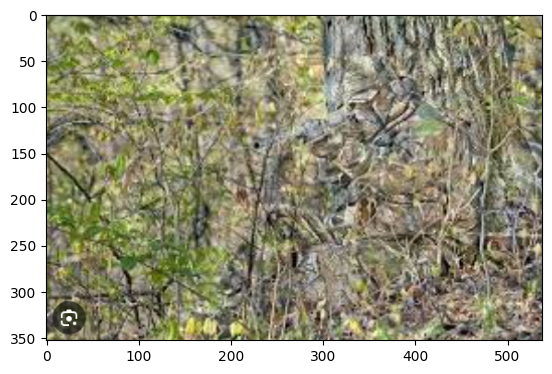

In [33]:
# prompt: read image, show image

# Import libraries
import matplotlib.pyplot as plt

# Read the image
image = plt.imread("/content/WhereIsTheHunter7.png")

# Show the image
plt.imshow(image)
plt.show()


In [77]:
# prompt: read video, for each frame if each value of the current element != next element, then subtract current element value by the next element value, use the result to draw a line for each cell that are different with pink color, save video

import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture("/content/uav-clips.mp4")

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the width and height of the video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a video writer object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Read the first frame of the video
ret, frame1 = cap.read()

while ret:
  # Read the next frame of the video
  ret, frame2 = cap.read()

  if not ret:
    break

  # Convert the frames to grayscale
  gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

  # Calculate the difference between the two frames
  diff = cv2.absdiff(gray1, gray2)

  # Threshold the difference image
  diff[diff < 20] = 0
  diff[diff >= 20] = 255

  # Find the contours in the difference image
  contours, _ = cv2.findContours(diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw the contours on the frame
  for contour in contours:
    cv2.drawContours(frame1, [contour], -1, (255, 0, 255), 2)

  # Write the frame to the video file
  out.write(frame1)

  # Update the previous frame
  frame1 = frame2

# Release the video capture and video writer objects
cap.release()
out.release()
